<a href="https://colab.research.google.com/github/yiseeun/yiseeun/blob/main/Kaggle_data%EB%A5%BC_%ED%86%B5%ED%95%9C_CNN_%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [23]:
drive.mount("/content/drive/",force_remount=True)

Mounted at /content/drive/


In [1]:
pwd

'/content'

In [2]:
ls

drive/  sample_data/


In [3]:
cd /content/drive/MyDrive/Kaggle Data

/content/drive/MyDrive/Kaggle Data


In [4]:
train_dir="smile"
trian_dir="non_smile"

In [5]:
ls

non_smile/  smile/


Text(0.5, 1.0, 'non_smile')

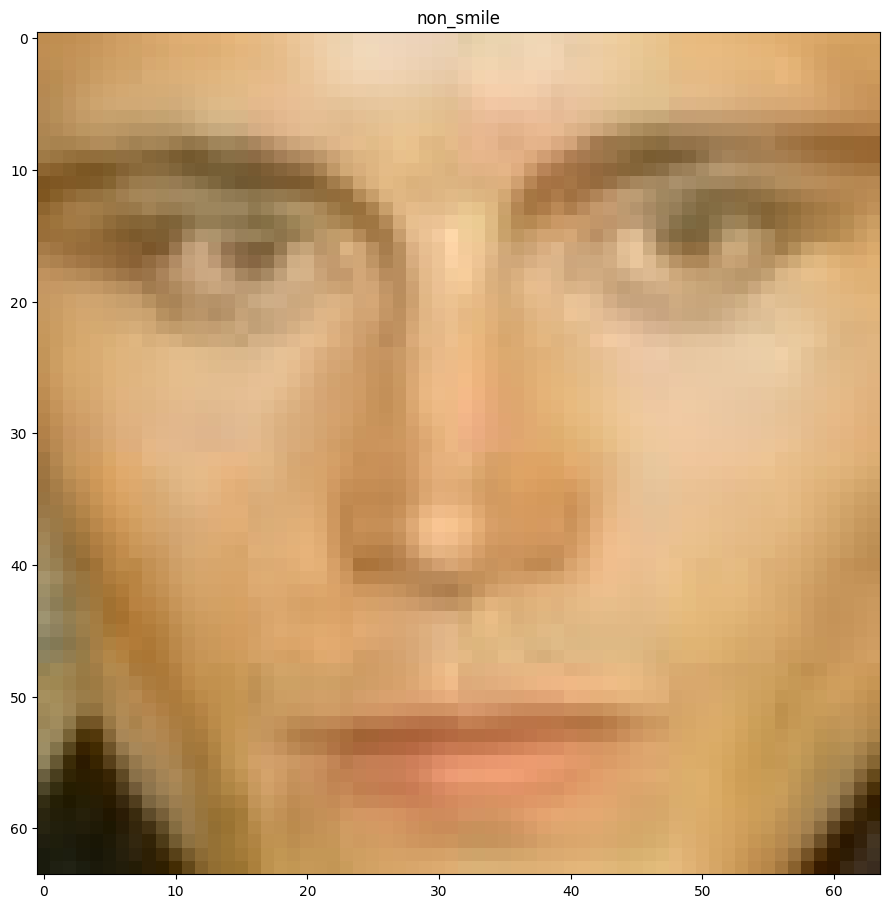

In [18]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

image_sample= imread('non_smile/Adam_Ant_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample, ax=ax)
ax.set_title('non_smile')
#ax.axis('off');

Text(0.5, 1.0, 'smile')

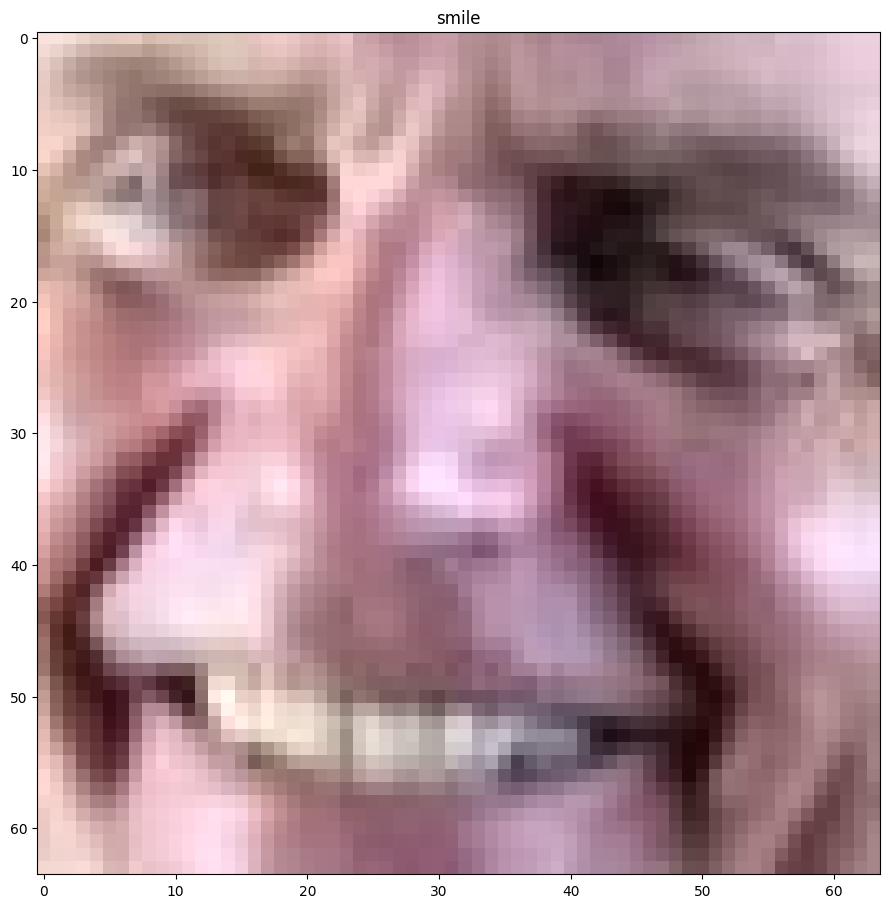

In [20]:
image_sample2= imread('smile/James_Jones_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample2, ax=ax)
ax.set_title('smile')

In [21]:
image_sample2.shape

(64, 64, 3)

In [22]:
cd /

/


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

train_gen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
    )

train = train_gen.flow_from_directory(directory='../content/drive/MyDrive/Kaggle Data',
                                              target_size=(160, 185),
                                              color_mode='rgb',
                                              class_mode='categorical',
                                              batch_size=20,
                                              shuffle=True)

valid_gen = ImageDataGenerator(
        rescale=1./255
    )


test = valid_gen.flow_from_directory(directory='../content/drive/MyDrive/Kaggle Data',
                                              target_size=(160, 185),
                                              color_mode='rgb',
                                              class_mode='categorical',
                                              batch_size=3,
                                              shuffle=True)


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(160, 185, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.fit_generator(train, validation_data = test, epochs=5 )

Found 1203 images belonging to 2 classes.
Found 1203 images belonging to 2 classes.


<ipython-input-24-abb0b3228138>:51: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train, validation_data = test, epochs=5 )


Epoch 1/5
61/61 [==============================] - 404s 7s/step - loss: 2.0858 - accuracy: 0.4855 - val_loss: 0.6910 - val_accuracy: 0.4979
Epoch 2/5
61/61 [==============================] - 258s 4s/step - loss: 0.6982 - accuracy: 0.5079 - val_loss: 0.6871 - val_accuracy: 0.5536
Epoch 3/5
61/61 [==============================] - 293s 5s/step - loss: 0.6929 - accuracy: 0.5204 - val_loss: 0.6932 - val_accuracy: 0.5012
Epoch 4/5
61/61 [==============================] - 290s 5s/step - loss: 0.6934 - accuracy: 0.4954 - val_loss: 0.6931 - val_accuracy: 0.5004
Epoch 5/5
61/61 [==============================] - 291s 5s/step - loss: 0.6932 - accuracy: 0.5037 - val_loss: 0.6931 - val_accuracy: 0.5087
